In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import plotly.express as px
import optuna
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


In [2]:
import os
import sys

In [4]:
path = "C:\\Users\\ssriv\\Warlord\\data mining individual\\archive"

In [5]:
file1 = path + "\\diabetes_012_health_indicators_BRFSS2015.csv"
file2 = path + "\\diabetes_binary_5050split_health_indicators_BRFSS2015.csv"
file3 = path + "\\diabetes_binary_health_indicators_BRFSS2015.csv"

In [9]:
with open (file1) as file:
    file.read()

df1 = pd.read_csv(file1)
print("file1",df1.head())

with open (file2) as file:
    file.read()

df2 = pd.read_csv(file2)
print("file2",df2.head())

with open (file3) as file:
    file.read()

df3 = pd.read_csv(file3)
print("file3",df3.head())


file1    Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   


In [10]:
df1.isna().sum()
df2.isna().sum()
df3.isna().sum()



Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [11]:
df1.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [12]:
df2.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [13]:
df3.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [18]:
from mlxtend.frequent_patterns import apriori

In [23]:
df1.columns


Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [67]:
df2.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [66]:
df3.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [34]:
binary_cols1 = [
    'Diabetes_012', 'HighBP', 'HighChol', 'Smoker', 'Stroke',
    'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
    'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
    'DiffWalk', 'Sex', 
]
binary_cols2_3 = [
    'Diabetes_binary', 'HighBP', 'HighChol', 'Smoker', 'Stroke',
    'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
    'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
    'DiffWalk', 'Sex', 
]

df1_bin = df1[binary_cols1]
df2_bin = df2[binary_cols2_3]
df3_bin = df3[binary_cols2_3]


In [35]:
df1_bin.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex'],
      dtype='object')

In [51]:
df2_bin.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex'],
      dtype='object')

In [52]:
df3_bin.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex'],
      dtype='object')

In [ ]:
df1

In [53]:
frequent_itemsets2 = mx.apriori(
    df2_bin.astype(bool),
    min_support=0.05,
    use_colnames=True
)
print(frequent_itemsets2.head())

    support           itemsets
0  0.500000  (Diabetes_binary)
1  0.563458           (HighBP)
2  0.525703         (HighChol)
3  0.475273           (Smoker)
4  0.062171           (Stroke)


In [54]:
frequent_itemsets3 = mx.apriori(
    df3_bin.astype(bool),
    min_support=0.05,
    use_colnames=True
)
print(frequent_itemsets3.head())

    support                itemsets
0  0.139333       (Diabetes_binary)
1  0.429001                (HighBP)
2  0.424121              (HighChol)
3  0.443169                (Smoker)
4  0.094186  (HeartDiseaseorAttack)


In [55]:
rules2 = mx.association_rules(frequent_itemsets2, metric="confidence", min_threshold=0.5)
print(rules2.head())

         antecedents        consequents  antecedent support  \
0  (Diabetes_binary)           (HighBP)            0.500000   
1           (HighBP)  (Diabetes_binary)            0.563458   
2  (Diabetes_binary)         (HighChol)            0.500000   
3         (HighChol)  (Diabetes_binary)            0.525703   
4  (Diabetes_binary)           (Smoker)            0.500000   

   consequent support   support  confidence      lift  representativity  \
0            0.563458  0.376337    0.752674  1.335810               1.0   
1            0.500000  0.376337    0.667905  1.335810               1.0   
2            0.525703  0.335059    0.670118  1.274709               1.0   
3            0.500000  0.335059    0.637354  1.274709               1.0   
4            0.475273  0.259110    0.518220  1.090363               1.0   

   leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  
0  0.094608    1.765042       0.502782  0.547700   0.433441    0.710289  
1  0.094608    1.50559

In [56]:
rules2_filtered = rules2[(rules2['lift'] > 1.2) & (rules2['confidence'] > 0.6)]
rules2_filtered.sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
2040,"(AnyHealthcare, DiffWalk, HeartDiseaseorAttack)","(Diabetes_binary, HighBP)",0.070390,0.376337,0.051562,0.732516,1.946438,1.0,0.025071,2.331591,0.523059,0.130481,0.571108,0.434763
2042,"(DiffWalk, HeartDiseaseorAttack)","(Diabetes_binary, HighBP, AnyHealthcare)",0.073233,0.361922,0.051562,0.704076,1.945379,1.0,0.025057,2.156220,0.524362,0.134418,0.536225,0.423271
626,"(DiffWalk, HeartDiseaseorAttack)","(Diabetes_binary, HighBP)",0.073233,0.376337,0.053387,0.728994,1.937078,1.0,0.025826,2.301286,0.521985,0.134752,0.565460,0.435426
1764,"(HighBP, HeartDiseaseorAttack)","(Diabetes_binary, HighChol, AnyHealthcare)",0.120381,0.321875,0.073092,0.607168,1.886346,1.0,0.034344,1.726247,0.534180,0.197992,0.420708,0.417124
3424,"(Veggies, HighBP, HeartDiseaseorAttack)","(Diabetes_binary, HighChol, AnyHealthcare)",0.089756,0.321875,0.054405,0.606147,1.883173,1.0,0.025515,1.721770,0.515226,0.152299,0.419202,0.387586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2723,"(Fruits, HighChol, PhysActivity)","(HighBP, AnyHealthcare)",0.221298,0.541759,0.144189,0.651560,1.202675,1.0,0.024299,1.315122,0.216412,0.232988,0.239614,0.458855
1078,"(HighChol, AnyHealthcare, PhysActivity)",(HighBP),0.337096,0.563458,0.228385,0.677507,1.202409,1.0,0.038445,1.353648,0.253937,0.339773,0.261256,0.541417
2332,"(Veggies, HighChol, PhysActivity, Sex)",(Diabetes_binary),0.135560,0.500000,0.081409,0.600543,1.201085,1.0,0.013630,1.251698,0.193674,0.146909,0.201085,0.381681
3954,"(AnyHealthcare, PhysActivity, HighChol, Veggie...",(Diabetes_binary),0.131415,0.500000,0.078892,0.600323,1.200646,1.0,0.013184,1.251010,0.192399,0.142784,0.200646,0.379053


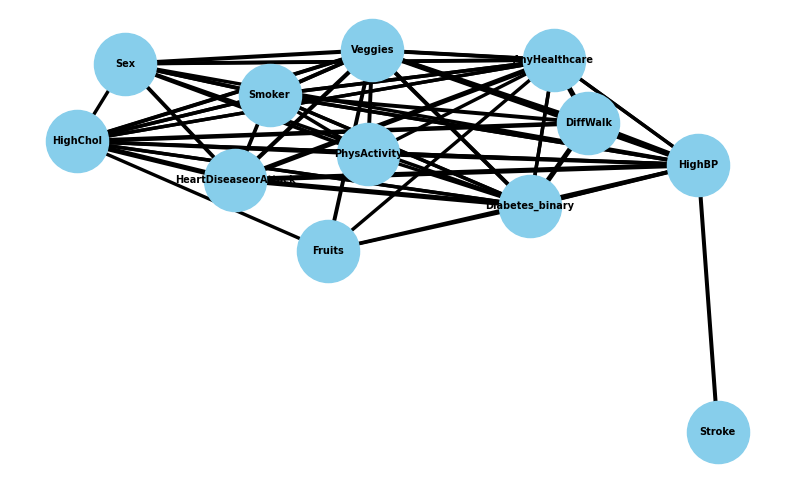

In [57]:
import networkx as nx

# Build graph (as before)
G = nx.DiGraph()
for _, row in rules2_filtered.iterrows():
    for ant in row['antecedents']:
        for cons in row['consequents']:
            G.add_edge(ant, cons, weight=row['lift'])

# Position nodes
pos = nx.spring_layout(G, k=1)

# Extract weights for edges
weights = [G[u][v]['weight']*2 for u,v in G.edges()]  # scale thickness

plt.figure(figsize=(10,6))

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='skyblue')

# Draw edges with weight
nx.draw_networkx_edges(G, pos, width=weights, arrowstyle='->', arrowsize=15)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=7, font_weight='bold')

plt.axis('off')
plt.show()


In [58]:


# Example: rules2_filtered contains top rules
rules_plot = rules2_filtered[rules2_filtered['lift'] > 1.2].copy()

# For hover info, combine antecedent & consequent
rules_plot['rule'] = rules_plot['antecedents'].apply(lambda x: ','.join(list(x))) + ' → ' + rules_plot['consequents'].apply(lambda x: ','.join(list(x)))


In [62]:
fig = px.scatter_3d(
    rules_plot,
    x='support',
    y='confidence',
    z='lift',
    color='confidence',                 # color by confidence
    size='support',            # scale marker by support
    hover_name='rule',            # show rule on hover
    size_max=15,
    title='3D Interactive Plot of Association Rules'
)

fig.show()


In [76]:
X = df2_bin.drop(columns=['Diabetes_binary'])
y = df2_bin['Diabetes_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
X_train.head()

,HighBP,HighChol,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,DiffWalk,Sex
61789,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
46280,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
18465,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
45540,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28119,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [78]:
y_train.head()

61789    1.0
46280    1.0
18465    0.0
45540    1.0
28119    0.0
Name: Diabetes_binary, dtype: float64

In [120]:
X1 = df3_bin.drop(columns=['Diabetes_binary'])
y1 = df3_bin['Diabetes_binary']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [118]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 600)
    max_depth = trial.suggest_int('max_depth', 10, 32)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42,
        n_jobs=-1,
        class_weight='balanced'
    )
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    return f1_score(y_test, y_pred)

study = optuna.create_study(direction='maximize', study_name="RF_Validation_Optimisation")

study.optimize(objective, n_trials=100, show_progress_bar=True)

best_rf = RandomForestClassifier(**study.best_params, random_state=42, n_jobs=-1)
best_rf.fit(X_train, y_train)
y_pred_best = best_rf.predict(X_test)

best_f1 = f1_score(y_test, y_pred_best)

print("\n Best Parameters Found:")
print(study.best_params)
print(f"F1: {best_f1:.3f}")

[I 2026-01-17 02:31:06,877] A new study created in memory with name: RF_Validation_Optimisation


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2026-01-17 02:31:07,522] Trial 0 finished with value: 0.7113437564570563 and parameters: {'n_estimators': 232, 'max_depth': 13, 'min_samples_split': 16, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.7113437564570563.
[I 2026-01-17 02:31:08,471] Trial 1 finished with value: 0.7173499864241107 and parameters: {'n_estimators': 369, 'max_depth': 15, 'min_samples_split': 11, 'min_samples_leaf': 20}. Best is trial 1 with value: 0.7173499864241107.
[I 2026-01-17 02:31:09,713] Trial 2 finished with value: 0.7151135046697117 and parameters: {'n_estimators': 487, 'max_depth': 14, 'min_samples_split': 9, 'min_samples_leaf': 7}. Best is trial 1 with value: 0.7173499864241107.
[I 2026-01-17 02:31:10,020] Trial 3 finished with value: 0.7164607086775449 and parameters: {'n_estimators': 107, 'max_depth': 11, 'min_samples_split': 18, 'min_samples_leaf': 13}. Best is trial 1 with value: 0.7173499864241107.
[I 2026-01-17 02:31:10,347] Trial 4 finished with value: 0.7130734736115902 and paramet

In [122]:
def objective1(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 600)
    max_depth = trial.suggest_int('max_depth', 10, 32)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    
    model2 = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42,
        n_jobs=-1,
        class_weight='balanced'
    )
    
    model2.fit(X_train1, y_train1)
    y_pred2 = model2.predict(X_test1)
    
    return f1_score(y_test1, y_pred2)

study1 = optuna.create_study(direction='maximize', study_name="RF_Validation_Optimisation")

study1.optimize(objective1, n_trials=100, show_progress_bar=True)

best_rf2 = RandomForestClassifier(**study1.best_params, random_state=42, n_jobs=-1)
best_rf2.fit(X_train1, y_train1)
y_pred_best = best_rf2.predict(X_test1)

best_f1 = f1_score(y_test1, y_pred_best)

print("\n Best Parameters Found:")
print(study1.best_params)
print(f"F1: {best_f1:.3f}")

[I 2026-01-17 02:51:13,337] A new study created in memory with name: RF_Validation_Optimisation


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2026-01-17 02:51:16,641] Trial 0 finished with value: 0.3948015712764786 and parameters: {'n_estimators': 439, 'max_depth': 29, 'min_samples_split': 3, 'min_samples_leaf': 16}. Best is trial 0 with value: 0.3948015712764786.
[I 2026-01-17 02:51:18,005] Trial 1 finished with value: 0.3936733711153091 and parameters: {'n_estimators': 149, 'max_depth': 13, 'min_samples_split': 14, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.3948015712764786.
[I 2026-01-17 02:51:19,900] Trial 2 finished with value: 0.3935166339784628 and parameters: {'n_estimators': 226, 'max_depth': 22, 'min_samples_split': 18, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.3948015712764786.
[I 2026-01-17 02:51:24,526] Trial 3 finished with value: 0.39549371432834707 and parameters: {'n_estimators': 572, 'max_depth': 23, 'min_samples_split': 13, 'min_samples_leaf': 12}. Best is trial 3 with value: 0.39549371432834707.
[I 2026-01-17 02:51:26,399] Trial 4 finished with value: 0.39389726328113567 and para

       HighBP  HighChol  Smoker  Stroke  HeartDiseaseorAttack  PhysActivity  \
44967     0.0       1.0     1.0     0.0                   0.0           1.0   
20220     0.0       0.0     1.0     0.0                   0.0           0.0   
23944     1.0       1.0     1.0     0.0                   0.0           1.0   
2707      0.0       1.0     1.0     0.0                   0.0           0.0   
42356     1.0       0.0     0.0     0.0                   0.0           1.0   
...       ...       ...     ...     ...                   ...           ...   
59313     1.0       0.0     0.0     1.0                   0.0           1.0   
44805     1.0       1.0     0.0     0.0                   0.0           0.0   
30661     0.0       0.0     0.0     0.0                   0.0           0.0   
30295     1.0       1.0     0.0     0.0                   0.0           1.0   
30199     0.0       1.0     1.0     0.0                   1.0           0.0   

       Fruits  Veggies  HvyAlcoholConsump  AnyHealt

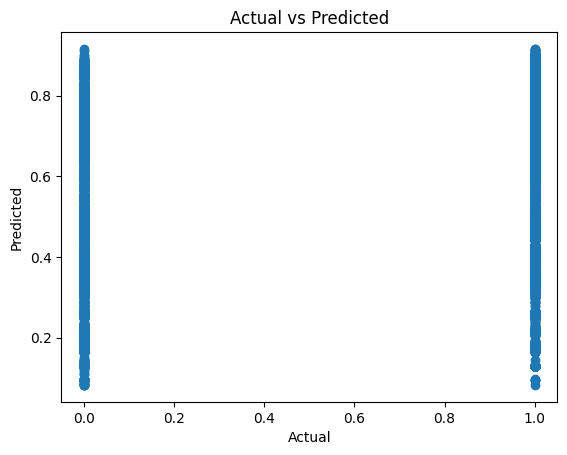

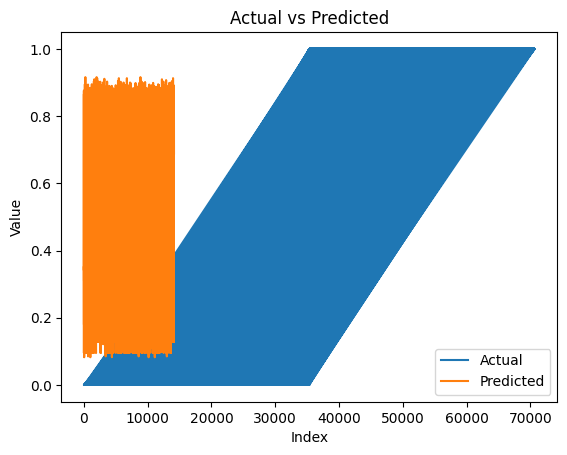

In [83]:
rf1 = RandomForestRegressor(n_estimators=study1.best_params['n_estimators'], max_depth=study1.best_params['max_depth'], min_samples_split=study1.best_params['min_samples_split'], min_samples_leaf=study1.best_params['min_samples_leaf'], random_state=42, n_jobs=-1)
rf1.fit(X_train, y_train)
y_pred_rf1 = rf1.predict(X_test)

print(X_test)
print(y_pred_rf1)

print("MAE:", mean_absolute_error(y_test, y_pred_rf1))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf1)))
print("R²:", r2_score(y_test, y_pred_rf1))

plt.scatter(y_test, y_pred_rf1)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

plt.plot(y_test, label="Actual")
plt.plot(y_pred_rf1, label="Predicted")
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()

In [85]:
df1.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [140]:
# 1. List only the actual clinical/behavioral features you want to use
clinical_features = [
    'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 
    'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 
    'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age'
]

# 2. Redefine X using only these columns
X_clean_2_3 = merged_df_2_3_clean[clinical_features]
y_clean_2_3 = merged_df_2_3_clean['Diabetes_binary']

# 3. Rerun your split and Random Forest Classifier (NOT Regressor!)
# This will likely increase your performance significantly.

In [141]:
merged_df_2_3_clean.shape

(229474, 23)

In [95]:
merged_df_2_3_clean.shape

(229474, 22)

In [142]:
merged_df_2_3_clean.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Risk_Group'],
      dtype='object')

In [144]:

X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean_2_3, y_clean_2_3, test_size=0.2, random_state=42)

In [151]:
X_train_clean.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Sex', 'Age'],
      dtype='object')

In [150]:
y_train_clean.value_counts().head()

Diabetes_binary
0.0    155403
1.0     28176
Name: count, dtype: int64

In [148]:
def objective_clean(trial):
    n_estimators = trial.suggest_int('n_estimators', 200, 1000)
    max_depth = trial.suggest_int('max_depth', 2, 64, log=True)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    
    model_clean = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42,
        n_jobs=-1,
        class_weight='balanced' 
    )
    
    model_clean.fit(X_train_clean, y_train_clean)
    y_pred_clean = model_clean.predict(X_test_clean)
    
    # Optimize for F1-Score (balances precision and recall)
    return f1_score(y_test_clean, y_pred_clean)

# Direction is 'maximize' because we want the highest F1-score
study_clean = optuna.create_study(direction='maximize', study_name="RF_Classification_Optimisation")
study_clean.optimize(objective_clean, n_trials=100, show_progress_bar=True)

best_rf_clean = RandomForestClassifier(**study_clean.best_params, random_state=42, n_jobs=-1)
best_rf_clean.fit(X_train_clean, y_train_clean)
y_pred_best_clean = best_rf_clean.predict(X_test_clean)

best_mae_clean = mean_absolute_error(y_test_clean, y_pred_best_clean)
best_rmse_clean = np.sqrt(mean_squared_error(y_test_clean, y_pred_best_clean))
best_f1_clean = f1_score(y_test_clean, y_pred_best_clean)

print("\n Best Parameters Found:")
print(study_clean.best_params)
print(f"MAE: {best_mae_clean:.3f}, RMSE: {best_rmse_clean:.3f}, f1_score: {best_f1_clean:.3f}")


[I 2026-01-17 03:54:50,384] A new study created in memory with name: RF_Classification_Optimisation


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2026-01-17 03:54:52,193] Trial 0 finished with value: 0.4248955722639933 and parameters: {'n_estimators': 300, 'max_depth': 2, 'min_samples_split': 5, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.4248955722639933.
[I 2026-01-17 03:54:59,670] Trial 1 finished with value: 0.4523016650342801 and parameters: {'n_estimators': 843, 'max_depth': 63, 'min_samples_split': 8, 'min_samples_leaf': 7}. Best is trial 1 with value: 0.4523016650342801.
[I 2026-01-17 03:55:04,482] Trial 2 finished with value: 0.4434926423815784 and parameters: {'n_estimators': 621, 'max_depth': 10, 'min_samples_split': 19, 'min_samples_leaf': 17}. Best is trial 1 with value: 0.4523016650342801.
[I 2026-01-17 03:55:09,803] Trial 3 finished with value: 0.4270341859117623 and parameters: {'n_estimators': 783, 'max_depth': 3, 'min_samples_split': 2, 'min_samples_leaf': 7}. Best is trial 1 with value: 0.4523016650342801.
[I 2026-01-17 03:55:15,677] Trial 4 finished with value: 0.4471179270227393 and parameters: 

In [109]:
rf_clean = RandomForestClassifier(**study_clean.best_params, random_state=42, n_jobs=-1)
rf_clean.fit(X_train_clean, y_train_clean)
y_pred_rf_clean = rf_clean.predict(X_test_clean)
print(y_pred_rf_clean)
print(y_test_clean)
print(f1_score(y_test_clean, y_pred_rf_clean))

[1. 1. 1. ... 1. 1. 1.]
273958    1.0
296147    1.0
277240    1.0
153974    1.0
1399      1.0
         ... 
257554    0.0
51188     1.0
181898    1.0
322095    1.0
236050    1.0
Name: CholCheck, Length: 45895, dtype: float64
0.9800993366445548


In [110]:
rf_clean.score(X_test_clean, y_test_clean)

0.9609761411918509

        Diabetes_binary  HighBP  HighChol   BMI  Smoker  Stroke  \
273958              0.0     1.0       0.0  23.0     0.0     0.0   
296147              0.0     1.0       0.0  28.0     1.0     0.0   
277240              0.0     0.0       0.0  35.0     0.0     0.0   
153974              0.0     0.0       1.0  33.0     1.0     0.0   
1399                0.0     1.0       1.0  27.0     0.0     0.0   
...                 ...     ...       ...   ...     ...     ...   
257554              0.0     0.0       1.0  24.0     1.0     0.0   
51188               1.0     1.0       1.0  33.0     1.0     0.0   
181898              0.0     1.0       1.0  27.0     1.0     0.0   
322095              0.0     1.0       0.0  30.0     0.0     0.0   
236050              0.0     1.0       0.0  31.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  \
273958                   0.0           1.0     0.0      1.0  ...   
296147                   0.0           1.0     1.0      1.0

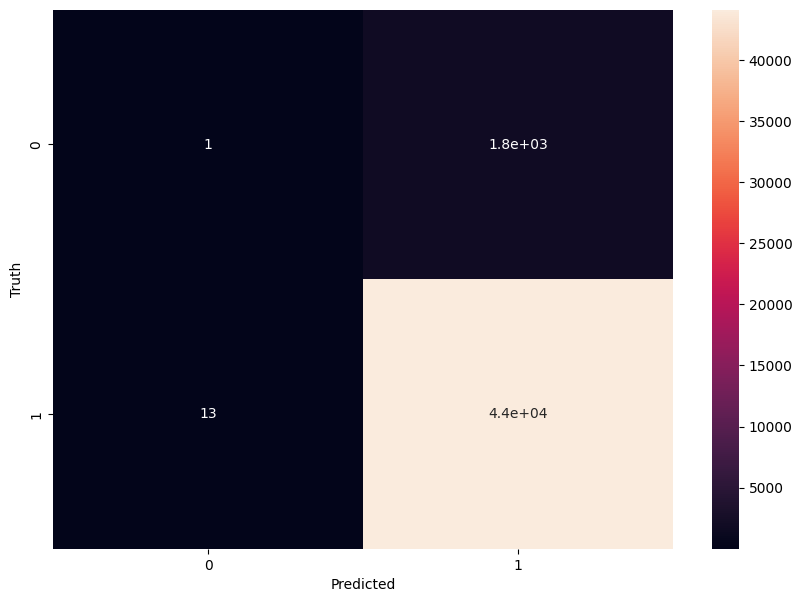

In [116]:

y_pred_rf_clean = rf_clean.predict(X_test_clean)

print(X_test_clean)
print(y_pred_rf_clean)

print("F1:", f1_score(y_test_clean, y_pred_rf_clean))

cm = confusion_matrix(y_test_clean, y_pred_rf_clean)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

C:\Users\ssriv\AppData\Local\Temp\ipykernel_59380\1475021812.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




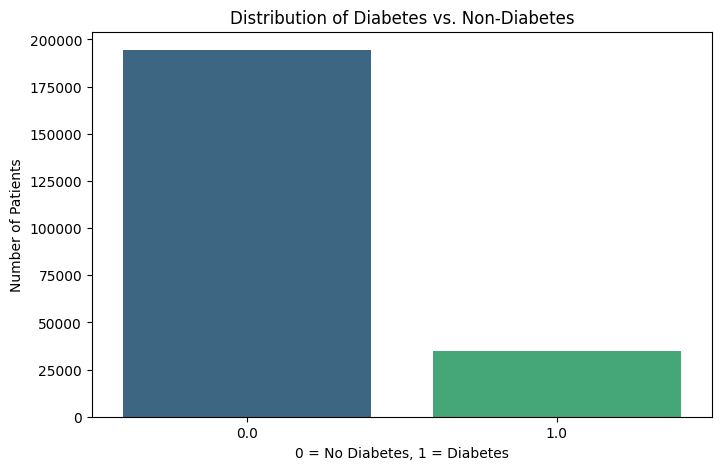

In [117]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(x='Diabetes_binary', data=merged_df_2_3_clean, palette='viridis')
plt.title('Distribution of Diabetes vs. Non-Diabetes')
plt.xlabel('0 = No Diabetes, 1 = Diabetes')
plt.ylabel('Number of Patients')
plt.show()

In [149]:
def objective_clean(trial):
    n_estimators = trial.suggest_int('n_estimators', 200, 1000)
    max_depth = trial.suggest_int('max_depth', 2, 64, log=True)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    
    model_clean1 = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42,
        n_jobs=-1,
        class_weight='balanced' 
    )
    
    model_clean1.fit(X_train_clean, y_train_clean)
    y_pred_clean1 = model_clean1.predict(X_test_clean)
    
    # Optimize for F1-Score (balances precision and recall)
    return mean_absolute_error(y_test_clean, y_pred_clean1)

# Direction is 'maximize' because we want the highest F1-score
study_clean1 = optuna.create_study(direction='minimize', study_name="RF_Classification_Optimisation")
study_clean1.optimize(objective_clean, n_trials=100, show_progress_bar=True)

best_rf_clean1 = RandomForestClassifier(**study_clean1.best_params, random_state=42, n_jobs=-1)
best_rf_clean1.fit(X_train_clean, y_train_clean)
y_pred_best_clean1 = best_rf_clean1.predict(X_test_clean)

best_mae_clean1 = mean_absolute_error(y_test_clean, y_pred_best_clean1)
best_rmse_clean1 = np.sqrt(mean_squared_error(y_test_clean, y_pred_best_clean1))
best_f1_clean1 = f1_score(y_test_clean, y_pred_best_clean1)

print("\n Best Parameters Found:")
print(study_clean1.best_params)
print(f"MAE: {best_mae_clean1:.3f}, RMSE: {best_rmse_clean1:.3f}, f1_score: {best_f1_clean1:.3f}")


[I 2026-01-17 04:02:44,781] A new study created in memory with name: RF_Classification_Optimisation


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2026-01-17 04:02:52,430] Trial 0 finished with value: 0.2593746595489705 and parameters: {'n_estimators': 861, 'max_depth': 15, 'min_samples_split': 16, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.2593746595489705.
[I 2026-01-17 04:02:54,471] Trial 1 finished with value: 0.30208083669245017 and parameters: {'n_estimators': 315, 'max_depth': 3, 'min_samples_split': 4, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.2593746595489705.
[I 2026-01-17 04:03:03,423] Trial 2 finished with value: 0.24553872970911864 and parameters: {'n_estimators': 970, 'max_depth': 35, 'min_samples_split': 17, 'min_samples_leaf': 7}. Best is trial 2 with value: 0.24553872970911864.
[I 2026-01-17 04:03:07,020] Trial 3 finished with value: 0.2848676326397211 and parameters: {'n_estimators': 466, 'max_depth': 10, 'min_samples_split': 13, 'min_samples_leaf': 1}. Best is trial 2 with value: 0.24553872970911864.
[I 2026-01-17 04:03:12,834] Trial 4 finished with value: 0.2698333151759451 and parame

In [126]:
rf_best = RandomForestClassifier(**study_clean.best_params, random_state=42, n_jobs=-1)
rf_best.fit(X_train_clean, y_train_clean)
y_pred_rf_best = rf_best.predict(X_test_clean)
print(y_pred_rf_best)
print(y_test_clean)
print(f1_score(y_test_clean, y_pred_rf_best))

[1. 1. 1. ... 1. 1. 1.]
273958    1.0
296147    1.0
277240    1.0
153974    1.0
1399      1.0
         ... 
257554    0.0
51188     1.0
181898    1.0
322095    1.0
236050    1.0
Name: CholCheck, Length: 45895, dtype: float64
0.9802017598435695


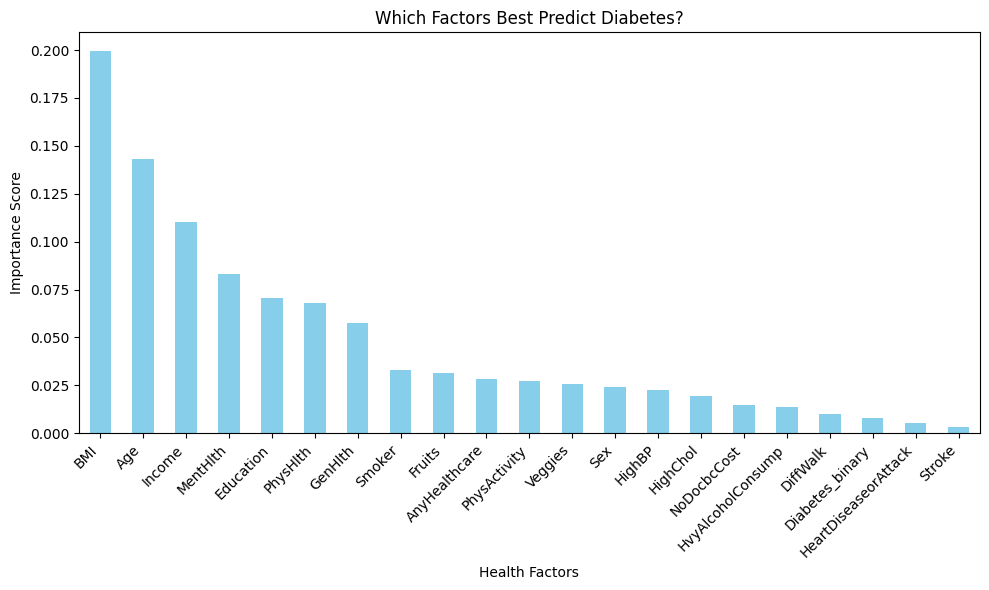

In [138]:
# 1. Get importances
importances1 = rf_best.feature_importances_

# 2. Use X_train_clean.columns instead of the full merged_df
feature_importance1 = pd.Series(importances1, index=X_train_clean.columns).sort_values(ascending=False)

# 3. Plotting
plt.figure(figsize=(10, 6)) # Made it a bit wider for readability
feature_importance1.plot(kind="bar", color='skyblue')
plt.ylabel("Importance Score")
plt.xlabel("Health Factors")
plt.title("Which Factors Best Predict Diabetes?")
plt.xticks(rotation=45, ha='right') # Rotates labels so they don't overlap
plt.tight_layout()
plt.show()

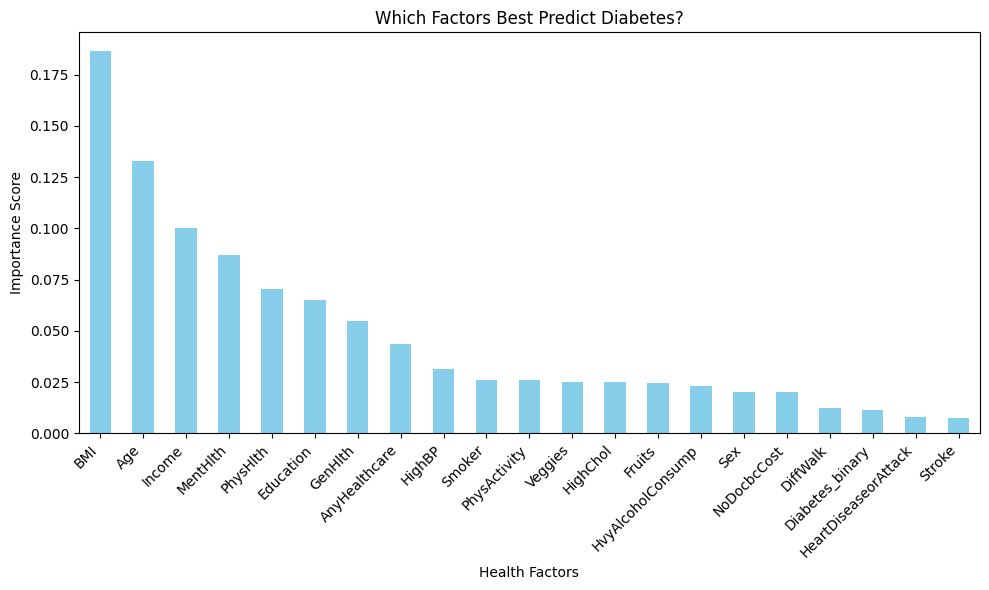

In [139]:
# 1. Get importances
importances = rf_best1.feature_importances_

# 2. Use X_train_clean.columns instead of the full merged_df
feature_importance = pd.Series(importances, index=X_train_clean.columns).sort_values(ascending=False)

# 3. Plotting
plt.figure(figsize=(10, 6)) # Made it a bit wider for readability
feature_importance.plot(kind="bar", color='skyblue')
plt.ylabel("Importance Score")
plt.xlabel("Health Factors")
plt.title("Which Factors Best Predict Diabetes?")
plt.xticks(rotation=45, ha='right') # Rotates labels so they don't overlap
plt.tight_layout()
plt.show()

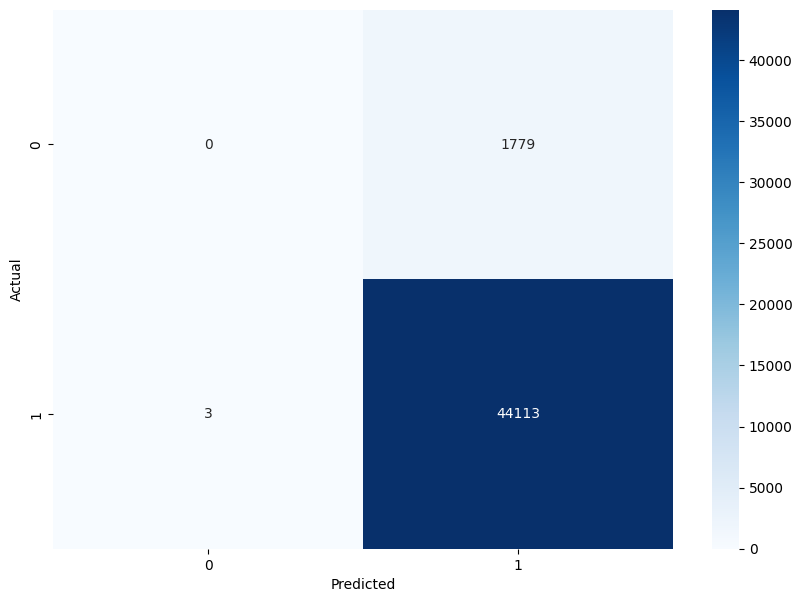

In [127]:
cm_best = confusion_matrix(y_test_clean, y_pred_best_clean)
plt.figure(figsize=(10,7))
sns.heatmap(cm_best, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

[1. 1. 1. ... 1. 1. 1.]
273958    1.0
296147    1.0
277240    1.0
153974    1.0
1399      1.0
         ... 
257554    0.0
51188     1.0
181898    1.0
322095    1.0
236050    1.0
Name: CholCheck, Length: 45895, dtype: float64
0.9802357489640156


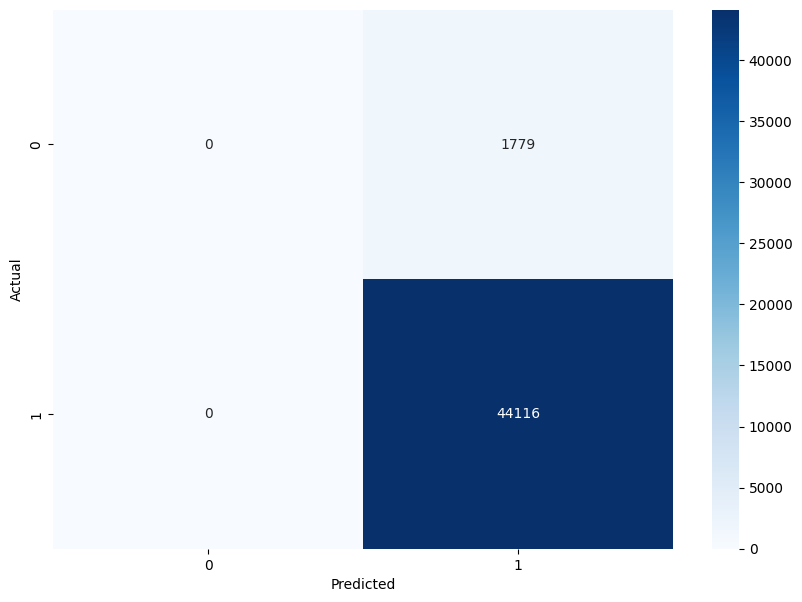

In [128]:
rf_best1 = RandomForestClassifier(**study_clean1.best_params, random_state=42, n_jobs=-1)
rf_best1.fit(X_train_clean, y_train_clean)
y_pred_rf_best1 = rf_best1.predict(X_test_clean)
print(y_pred_rf_best1)
print(y_test_clean)
print(f1_score(y_test_clean, y_pred_rf_best1))
cm_best1 = confusion_matrix(y_test_clean, y_pred_rf_best1)
plt.figure(figsize=(10,7))
sns.heatmap(cm_best1, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

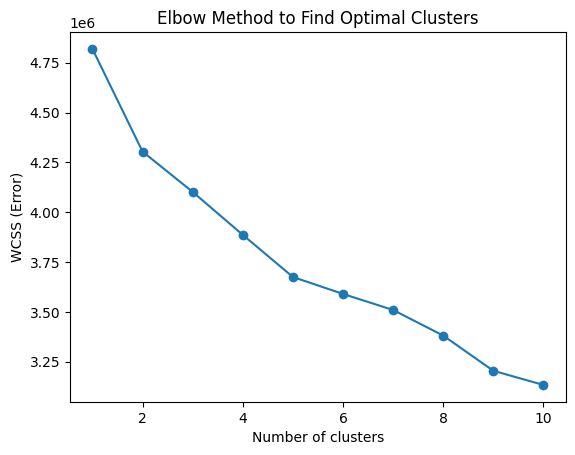

Data successfully grouped into 3 clusters.


C:\Users\ssriv\AppData\Local\Temp\ipykernel_59380\1027998852.py:33: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [129]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1. Prepare features (X) for clustering
# Drop the target and potentially non-medical columns like Education/Income
features_for_clustering = merged_df_2_3_clean.drop(columns=['Diabetes_binary'])

# 2. Scale the data (Crucial for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features_for_clustering)

# 3. Find the optimal number of clusters (The Elbow Method)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method to Find Optimal Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Error)')
plt.show()

# 4. Train the Final Model (Assuming the "elbow" is at 3 or 4)
k = 3 
kmeans_final = KMeans(n_clusters=k, init='k-means++', random_state=42)
cluster_labels = kmeans_final.fit_predict(X_scaled)

# 5. Add the Cluster labels back to your original data
merged_df_2_3_clean['Risk_Group'] = cluster_labels

print(f"Data successfully grouped into {k} clusters.")

In [130]:
# Compare the mean values of each group
cluster_analysis = merged_df_2_3_clean.groupby('Risk_Group').mean()

# Specifically check how many people in each cluster actually have diabetes
diabetes_by_cluster = merged_df_2_3_clean.groupby('Risk_Group')['Diabetes_binary'].value_counts(normalize=True).unstack()

print("Average Risk Factors per Cluster:")
print(cluster_analysis[['BMI', 'HighBP', 'HighChol', 'Age', 'PhysActivity']])

print("\nDiabetes Prevalence per Cluster:")
print(diabetes_by_cluster)

Average Risk Factors per Cluster:
                  BMI    HighBP  HighChol       Age  PhysActivity
Risk_Group                                                       
0           27.731125  0.340435  0.361872  7.554030      0.833689
1           31.188699  0.709931  0.619868  9.190896      0.484455
2           29.032478  0.740665  0.646538  9.916667      0.611921

Diabetes Prevalence per Cluster:
Diabetes_binary       0.0       1.0
Risk_Group                         
0                0.911434  0.088566
1                0.703119  0.296881
2                0.682225  0.317775


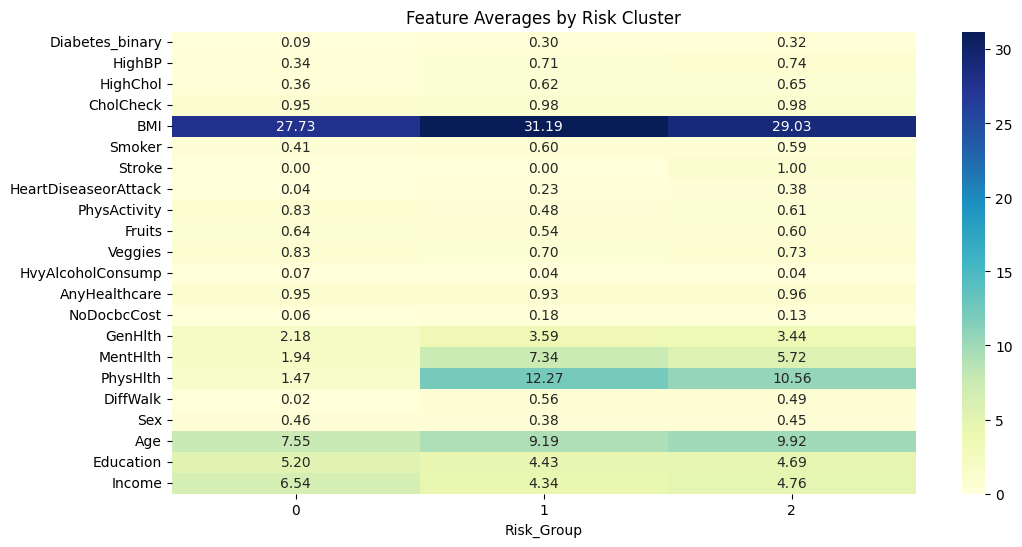

In [131]:

# Normalize the data for better visualization in a heatmap
cluster_summary = merged_df_2_3_clean.groupby('Risk_Group').mean()

plt.figure(figsize=(12, 6))
sns.heatmap(cluster_summary.T, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Feature Averages by Risk Cluster')
plt.show()


--- Detailed Classification Report ---
              precision    recall  f1-score   support

         0.0       0.91      0.88      0.89     38974
         1.0       0.42      0.48      0.45      6921

    accuracy                           0.82     45895
   macro avg       0.66      0.68      0.67     45895
weighted avg       0.83      0.82      0.83     45895



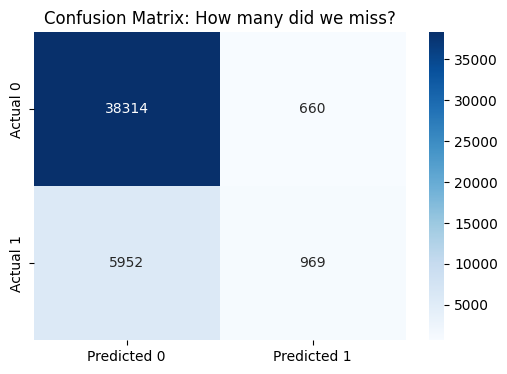

In [153]:
from sklearn.metrics import classification_report

# 1. Generate the detailed report
print("--- Detailed Classification Report ---")
# Instead of model.predict(), use probabilities
y_probs = best_rf_clean.predict_proba(X_test_clean)[:, 1]

# Set a lower threshold (e.g., 0.3 instead of 0.5)
y_pred_adjusted = (y_probs >= 0.3).astype(int)

print(classification_report(y_test_clean, y_pred_adjusted))
# 2. Plot the Confusion Matrix
cm = confusion_matrix(y_test_clean, y_pred_best_clean)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix: How many did we miss?')
plt.show()

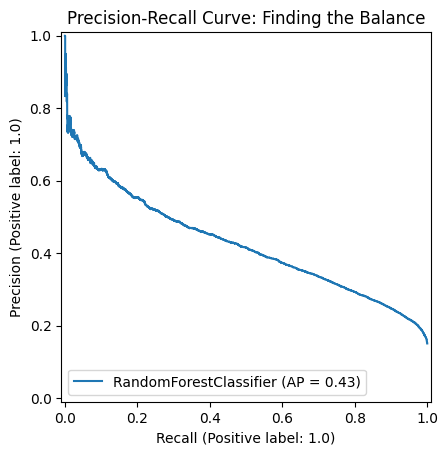

In [154]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(best_rf_clean, X_test_clean, y_test_clean)
plt.title("Precision-Recall Curve: Finding the Balance")
plt.show()